# Loading of the Main libraries

In [520]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


# UNZIPPING IM.DB AND CONNECTING TO SQLITE

In [521]:
import zipfile
import os

zip_path = "../zippedData/im.db.zip"
extract_path = "../zippedData/"

if not os.path.exists(os.path.join(extract_path, "im.db")):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("im.db extracted successfully!")
else:
    print("im.db already extracted.")        

im.db already extracted.


In [522]:
import sqlite3
import pandas as pd

connect = sqlite3.connect("../zippedData/im.db")

movie_basics = pd.read_sql("SELECT * FROM movie_basics", connect)
movie_ratings =pd.read_sql("SELECT * FROM movie_ratings", connect)

movie_basics.head()



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [523]:
movie_basics.info()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [524]:
merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,votes,year,main_genre,title_norm,title,domestic_gross,foreign_gross,rating_category,decade,log_revenue
0,tt0315642,Wazir,Wazir,2016,103,"[Action, Crime, Drama]",7.1,15378,2016,Action,wazir,Wazir,1100000,<NA>,Good,2010,13.910822
1,tt0337692,On the Road,On the Road,2012,124,"[Adventure, Drama, Romance]",6.1,37886,2012,Adventure,on the road,On the Road,744000,8000000,Average,2010,13.519798
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"[Adventure, Comedy, Drama]",7.3,275300,2013,Adventure,the secret life of walter mitty,The Secret Life of Walter Mitty,58200000,129900000,Good,2010,17.879396
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114,"[Action, Crime, Drama]",6.5,105116,2014,Action,a walk among the tombstones,A Walk Among the Tombstones,26300000,26900000,Good,2010,17.08508
4,tt0369610,Jurassic World,Jurassic World,2015,124,"[Action, Adventure, Sci-Fi]",7.0,539338,2015,Action,jurassic world,Jurassic World,652300000,1019,Good,2010,20.296015


In [525]:
#Converting Revenue to millions for easier readibilty when ploting
merged['domestic_gross_millions'] = (merged['domestic_gross'] /1_000_000).round(2)
merged['foreign_gross_millions'] = (merged['foreign_gross'] / 1_000_000).round(2)

merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,votes,year,main_genre,title_norm,title,domestic_gross,foreign_gross,rating_category,decade,log_revenue,domestic_gross_millions,foreign_gross_millions
0,tt0315642,Wazir,Wazir,2016,103,"[Action, Crime, Drama]",7.1,15378,2016,Action,wazir,Wazir,1100000,<NA>,Good,2010,13.910822,1.1,<NA>
1,tt0337692,On the Road,On the Road,2012,124,"[Adventure, Drama, Romance]",6.1,37886,2012,Adventure,on the road,On the Road,744000,8000000,Average,2010,13.519798,0.74,8.0
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"[Adventure, Comedy, Drama]",7.3,275300,2013,Adventure,the secret life of walter mitty,The Secret Life of Walter Mitty,58200000,129900000,Good,2010,17.879396,58.2,129.9
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114,"[Action, Crime, Drama]",6.5,105116,2014,Action,a walk among the tombstones,A Walk Among the Tombstones,26300000,26900000,Good,2010,17.08508,26.3,26.9
4,tt0369610,Jurassic World,Jurassic World,2015,124,"[Action, Adventure, Sci-Fi]",7.0,539338,2015,Action,jurassic world,Jurassic World,652300000,1019,Good,2010,20.296015,652.3,0.0


In [526]:
merged.describe()

,start_year,runtime_minutes,avg_rating,votes,year,domestic_gross,foreign_gross,decade,log_revenue,domestic_gross_millions,foreign_gross_millions
count,1681.0,1681.0,1681.000000,1681.0,1681.0,1673.0,1206.0,1681.0,1673.0,1673.0,1206.0
mean,2013.925045,111.440809,6.440036,96841.593099,2013.925045,44833175.067543,93746705.266998,2010.0,15.642793,44.83312,93.746716
std,2.510046,19.420264,0.996702,152392.44297,2.510046,78876368.009269,152977165.813403,0.0,2.766777,78.876399,152.977159
min,2010.0,44.0,1.600000,1008.0,2010.0,300.0,600.0,2010.0,5.70711,0.0,0.0
25%,2012.0,97.0,5.900000,10833.0,2012.0,921000.0,7400000.0,2010.0,13.733216,0.92,7.4
50%,2014.0,107.0,6.500000,40309.0,2014.0,13800000.0,30800000.0,2010.0,16.440179,13.8,30.8
75%,2016.0,123.0,7.100000,111907.0,2016.0,54800000.0,102525000.0,2010.0,17.819201,54.8,102.525
max,2018.0,189.0,8.800000,1841066.0,2018.0,700100000.0,960500000.0,2010.0,20.366734,700.1,960.5


In [527]:
merged.isna().sum()

movie_id                     0
primary_title                0
original_title               0
start_year                   0
runtime_minutes              0
genres                       0
avg_rating                   0
votes                        0
year                         0
main_genre                   0
title_norm                   0
title                        0
domestic_gross               8
foreign_gross              475
rating_category              0
decade                       0
log_revenue                  8
domestic_gross_millions      8
foreign_gross_millions     475
dtype: int64

# LOADING THE TWO TABLES

In [528]:
import sqlite3
import numpy as np
import pandas as pd

connect = sqlite3.connect("../zippedData/im.db")

movie_basics = pd.read_sql("""
    SELECT movie_id, primary_title, original_title, start_year, runtime_minutes, genres
    FROM movie_basics
""", connect)

movie_ratings = pd.read_sql("""
    SELECT movie_id, averageRating AS avg_rating, numVotes AS votes
    FROM movie_ratings
""", connect)

len(movie_basics), len(movie_ratings), movie_basics.head(2), movie_ratings.head(2)

(146144,
 73856,
     movie_id                    primary_title   original_title  start_year  \
 0  tt0063540                        Sunghursh        Sunghursh        2013   
 1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   
 
    runtime_minutes              genres  
 0            175.0  Action,Crime,Drama  
 1            114.0     Biography,Drama  ,
      movie_id  avg_rating  votes
 0  tt10356526         8.3     31
 1  tt10384606         8.9    559)

# STANDARDIZE DTYPES

In [529]:
movie_basics["start_year"] = pd.to_numeric(movie_basics["start_year"], errors="coerce").astype("Int64")
movie_basics["runtime_minutes"] = pd.to_numeric(movie_basics["runtime_minutes"], errors="coerce").astype("Int64")

movie_ratings["avg_rating"] = pd.to_numeric(movie_ratings["avg_rating"], errors="coerce")
movie_ratings["votes"]= pd.to_numeric(movie_ratings["votes"], errors="coerce").astype("Int64")

# Tidying the strings

In [530]:
for c in ["primary_title", "original_title", "genres"]:
    movie_basics[c] = movie_basics[c].astype("string").str.strip()

# KEEPING MOVIES WITH A YEAR AND A POSITIVE NUMBER OF VOTES

In [531]:
movie_basics = movie_basics.dropna(subset=["start_year"])
movie_ratings = movie_ratings.dropna(subset=["avg_rating", "votes"])

# REMOVING OF DUPLICATES IN MOVIE_ID

In [532]:
movie_basics = movie_basics.drop_duplicates(subset="movie_id")
movie_ratings = movie_ratings.drop_duplicates(subset="movie_id")

In [533]:
movie_ratings = movie_ratings[movie_ratings["votes"] >= 1000]

In [534]:
movie_basics.info(), movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         146144 non-null  object
 1   primary_title    146144 non-null  string
 2   original_title   146123 non-null  string
 3   start_year       146144 non-null  Int64 
 4   runtime_minutes  114405 non-null  Int64 
 5   genres           140736 non-null  string
dtypes: Int64(2), object(1), string(3)
memory usage: 7.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9617 entries, 3 to 73831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_id    9617 non-null   object 
 1   avg_rating  9617 non-null   float64
 2   votes       9617 non-null   Int64  
dtypes: Int64(1), float64(1), object(1)
memory usage: 309.9+ KB


(None, None)

# CONVERTING MOVIE ID INTO A STRING

In [535]:
movie_basics["movie_id"] = movie_basics["movie_id"].astype("string")
movie_ratings["movie_id"] = movie_ratings["movie_id"].astype("string")

In [536]:
movie_basics = movie_basics.dropna(subset=["runtime_minutes"])

In [537]:
movie_basics["genres"] = movie_basics["genres"].str.split(",")

In [538]:
movie_basics.info(), movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         114405 non-null  string
 1   primary_title    114405 non-null  string
 2   original_title   114401 non-null  string
 3   start_year       114405 non-null  Int64 
 4   runtime_minutes  114405 non-null  Int64 
 5   genres           112233 non-null  object
dtypes: Int64(2), object(1), string(3)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9617 entries, 3 to 73831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_id    9617 non-null   string 
 1   avg_rating  9617 non-null   float64
 2   votes       9617 non-null   Int64  
dtypes: Int64(1), float64(1), string(1)
memory usage: 309.9 KB


(None, None)

# REPLACING MISSING GENRES WITH UNKNOWN

In [539]:
movie_basics["genres"] = movie_basics["genres"].apply(lambda x: x if isinstance(x, list) else["unkown"])

In [540]:
movie_basics.info(), movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         114405 non-null  string
 1   primary_title    114405 non-null  string
 2   original_title   114401 non-null  string
 3   start_year       114405 non-null  Int64 
 4   runtime_minutes  114405 non-null  Int64 
 5   genres           114405 non-null  object
dtypes: Int64(2), object(1), string(3)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9617 entries, 3 to 73831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_id    9617 non-null   string 
 1   avg_rating  9617 non-null   float64
 2   votes       9617 non-null   Int64  
dtypes: Int64(1), float64(1), string(1)
memory usage: 309.9 KB


(None, None)

# MERGING THE CLEANED IMDB

In [541]:
imdb_clean = movie_basics.merge(movie_ratings, on="movie_id", how="inner")

imdb_clean["year"] = imdb_clean["start_year"].astype("Int64")
imdb_clean["main_genre"] = imdb_clean["genres"].str[0].fillna("Unknown")

imdb_clean["title_norm"] = (
    imdb_clean["primary_title"]
        .str.lower()
        .str.replace("[^a-z0-9 ]", "", regex=True)
        .str.strip()
)

imdb_clean.head(), imdb_clean.shape


(    movie_id               primary_title              original_title  \
 0  tt0069049  The Other Side of the Wind  The Other Side of the Wind   
 1  tt0249516                  Foodfight!                  Foodfight!   
 2  tt0293069                  Dark Blood                  Dark Blood   
 3  tt0315642                       Wazir                       Wazir   
 4  tt0323808             The Wicker Tree             The Wicker Tree   
 
    start_year  runtime_minutes                       genres  avg_rating  \
 0        2018              122                      [Drama]         6.9   
 1        2012               91  [Action, Animation, Comedy]         1.9   
 2        2012               86                   [Thriller]         6.6   
 3        2016              103       [Action, Crime, Drama]         7.1   
 4        2011               96              [Drama, Horror]         3.9   
 
    votes  year main_genre                  title_norm  
 0   4517  2018      Drama  the other side of

# CLEANING THE BOX OFFICE

In [542]:
bom = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")
bom.head(), bom.columns.tolist(), bom.shape

(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  ,
 ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'],
 (3387, 5))

# CLEANING CURRENCY AND YEAR

In [543]:
bom.columns = [c.lower().strip() for c in bom.columns]

def money_to_int(s):
    if pd.isna(s):return np.nan
    return pd.to_numeric(str(s).replace("$","").str(), errors="coerce")

In [544]:
for col in ["domestic_gross", "foreign_gross", "worldwide_gross"]:
    if col in bom.columns:
        bom[col] = (
            pd.to_numeric(
                bom[col].astype("string").str.replace(r"[\$,]", "", regex=True),
                errors="coerce"
            ).astype("Int64")
        )


In [545]:
year_col = "year" if "year" in bom.columns else ("release_year" if "release_year" in bom.columns else None)
if year_col is None:
    raise ValueError("Could not find a year column in the BOM file — check bom.columns")


bom["year"] = (
    pd.to_numeric(
        bom[year_col].astype("string").str.extract(r"(\d{4})", expand=False),
        errors="coerce"
    ).astype("Int64")
)


# TIDYING TITLE AND THE NORMALIZED VERSION

In [546]:
title_column = "title" if "title" in bom.columns else ("movie" if "movie" in bom.columns else None)
if title_column is None:
    raise ValueError("Could not find a title column in the BOM file - check bom.columns")

bom["title"] = bom[title_column].astype("string").str.strip()
bom["title_norm"] = (bom["title"]
                     .str.lower()
                     .str.replace(r"[:.,''!?\-]"," ", regex=True)
                     .str.replace(r"\s+", " ", regex=True)
                     .str.strip())



In [547]:
bom = bom.dropna(subset=["title", "year"])
bom = bom.drop_duplicates(subset=["title_norm","year"])

In [548]:
bom.head(), bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   string
 1   studio          3382 non-null   object
 2   domestic_gross  3359 non-null   Int64 
 3   foreign_gross   2037 non-null   Int64 
 4   year            3387 non-null   Int64 
 5   title_norm      3387 non-null   string
dtypes: Int64(3), object(1), string(2)
memory usage: 168.8+ KB


(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV       415000000   
 1                   Alice in Wonderland (2010)     BV       334200000   
 2  Harry Potter and the Deathly Hallows Part 1     WB       296000000   
 3                                    Inception     WB       292600000   
 4                          Shrek Forever After   P/DW       238700000   
 
    foreign_gross  year                                   title_norm  
 0      652000000  2010                                  toy story 3  
 1      691300000  2010                   alice in wonderland (2010)  
 2      664300000  2010  harry potter and the deathly hallows part 1  
 3      535700000  2010                                    inception  
 4      513900000  2010                          shrek forever after  ,
 None)

# MERGING IMDB + BOM

In [549]:
cols_to_use = ["title", "title_norm", "year"] + \
    [c for c in ["domestic_gross", "foreign_gross", "worldwide_gross"] if c in bom.columns]

merged = imdb_clean.merge(
    bom[cols_to_use],
    on=["title_norm", "year"],
    how="inner",
    suffixes=("", "_bom")
)
print("Rows in IMDB clean:", len(imdb_clean))
print("Rows in BOM clean:,", len(bom))
print("Merged rows:", len(merged))

merged.head(30)

Rows in IMDB clean: 9609
Rows in BOM clean:, 3387
Merged rows: 1681


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,votes,year,main_genre,title_norm,title,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103,"[Action, Crime, Drama]",7.1,15378,2016,Action,wazir,Wazir,1100000,<NA>
1,tt0337692,On the Road,On the Road,2012,124,"[Adventure, Drama, Romance]",6.1,37886,2012,Adventure,on the road,On the Road,744000,8000000
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"[Adventure, Comedy, Drama]",7.3,275300,2013,Adventure,the secret life of walter mitty,The Secret Life of Walter Mitty,58200000,129900000
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114,"[Action, Crime, Drama]",6.5,105116,2014,Action,a walk among the tombstones,A Walk Among the Tombstones,26300000,26900000
4,tt0369610,Jurassic World,Jurassic World,2015,124,"[Action, Adventure, Sci-Fi]",7.0,539338,2015,Action,jurassic world,Jurassic World,652300000,1019
5,tt0376136,The Rum Diary,The Rum Diary,2011,119,"[Comedy, Drama]",6.2,94787,2011,Comedy,the rum diary,The Rum Diary,13100000,10800000
6,tt0376479,American Pastoral,American Pastoral,2016,108,"[Crime, Drama]",6.1,12898,2016,Crime,american pastoral,American Pastoral,544000,<NA>
7,tt0383010,The Three Stooges,The Three Stooges,2012,92,"[Comedy, Family]",5.1,28570,2012,Comedy,the three stooges,The Three Stooges,44300000,10500000
8,tt0398286,Tangled,Tangled,2010,100,"[Adventure, Animation, Comedy]",7.8,366366,2010,Adventure,tangled,Tangled,200800000,391000000
9,tt0401729,John Carter,John Carter,2012,132,"[Action, Adventure, Sci-Fi]",6.6,241792,2012,Action,john carter,John Carter,73100000,211100000


# SAVING THE CLEANED DATASET

In [550]:
import os
os.makedirs("../clean", exist_ok=True)

imdb_clean.to_csv("../clean/imbd_clean.csv", index=False)
bom.to_csv("../clean/bom_clean.csv", index=False)
merged.to_csv("../clean/movies_merged.csv", index=False)

"saved to /clean: imbd_clean.csv, bom_clean.csv, movies_merged.csv"

'saved to /clean: imbd_clean.csv, bom_clean.csv, movies_merged.csv'

# FUTURE ENGINEERING OF THE DATA

In [551]:
#Creating a rate category for easier comparison and will group the movies into 4 quality classes
def rate_cat(x):
    if x < 5: return "Poor"
    elif x < 6.5: return "Average"
    elif x < 8: return "Good"
    else: return "Excellent"
merged["rating_category"] = merged["avg_rating"].apply(rate_cat)
merged["rating_category"].value_counts()


rating_category
Good         805
Average      690
Poor         116
Excellent     70
Name: count, dtype: int64

In [552]:
#Creating a decade column which helps with trend analysis
merged["decade"] = (merged["year"] // 10) * 10
merged[["year", "decade"]].head()

,year,decade
0,2016,2010
1,2012,2010
2,2013,2010
3,2014,2010
4,2015,2010


In [553]:
#Creating LOG Revenue which helps it to improve visualization which is usually very skewed
gross_col = "worldwide_gross" if "worldwide_gross" in merged.columns else "domestic_gross"
merged["log_revenue"] = np.log1p(merged[gross_col])
merged[["title_norm" , gross_col, "log_revenue"]].head()

,title_norm,domestic_gross,log_revenue
0,wazir,1100000,13.910822
1,on the road,744000,13.519798
2,the secret life of walter mitty,58200000,17.879396
3,a walk among the tombstones,26300000,17.08508
4,jurassic world,652300000,20.296015


# DISTRIBUTION ANALYSIS

# IMDb Ratings Distribution
By this we'll be able to know if most movies are well-rated or poorly-rated

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns


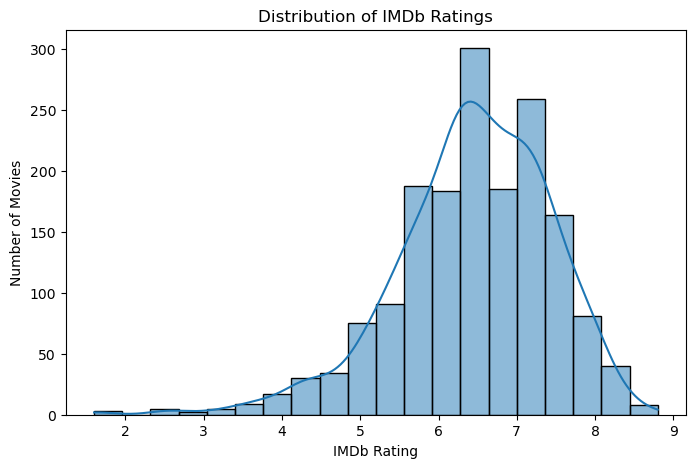

In [555]:
plt.figure(figsize=(8,5))
sns.histplot(merged["avg_rating"], kde=True, bins=20)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()


# Votes Distribution
Here we are going to see how many people rated each movie.

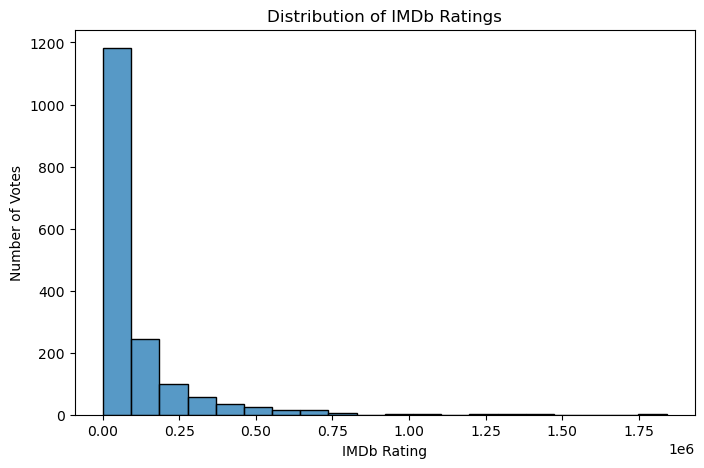

In [556]:
plt.figure(figsize=(8,5))
sns.histplot(merged["votes"], bins=20)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Votes")
plt.show()

# IMDb Rating vs Box Office
This graph is a scatter plot showing the relationship between IMDb Ratings and Box Office Revenue(usd) for different movies
Each dot Represents a movie 

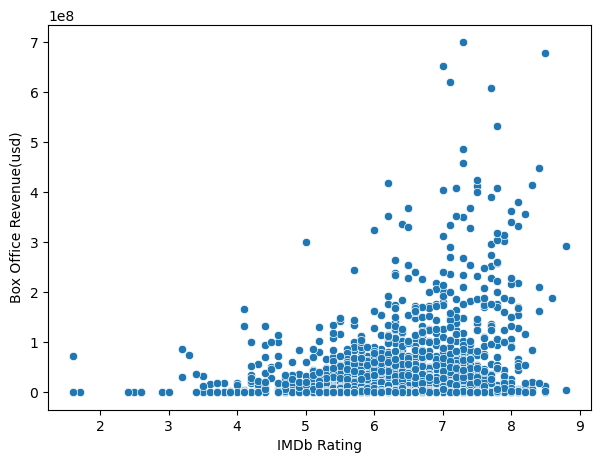

In [557]:
gross_col = "worldwide_gross" if "worldwide_gross" in merged.columns else "domestic_gross"
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged, x="avg_rating", y=gross_col)
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue(usd)")
plt.show()

# Top 20 Genres by Number of Movies

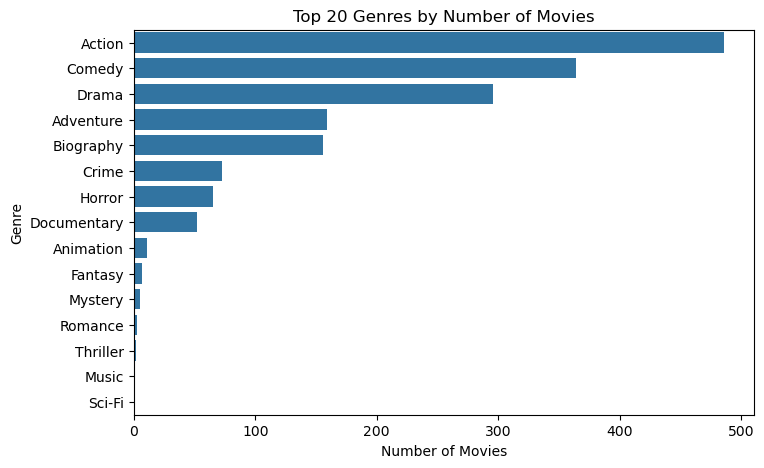

In [558]:
genre_counts = merged['main_genre'].value_counts().head(20)
plt.figure(figsize=(8,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 20 Genres by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

# Top 20 Genre and how much each had Gross

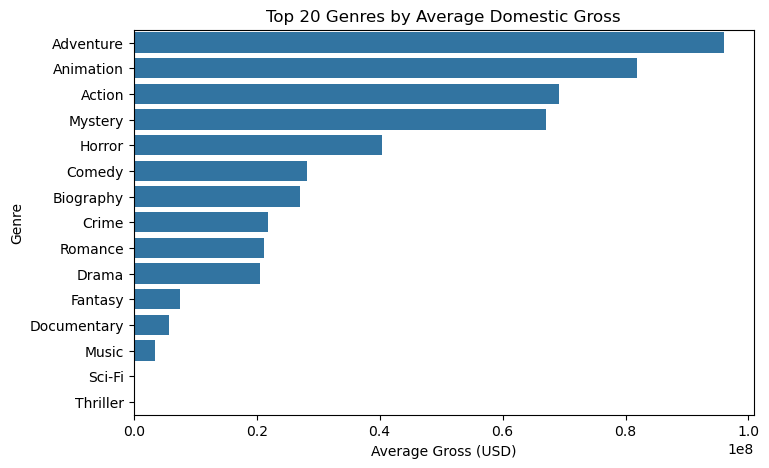

In [559]:
gross_col = "worldwide_gross" if "worldwide_gross" in merged.columns else "domestic_gross"
genre_gross = merged.groupby("main_genre")[gross_col].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,5))
sns.barplot(x=genre_gross.values, y=genre_gross.index)
plt.title(f"Top 20 Genres by Average {gross_col.replace('_', ' ').title()}")
plt.xlabel("Average Gross (USD)")
plt.ylabel("Genre")
plt.show()

# Plot for ROI Distribution
The chart below will show us how many movies lose money(ROI>0) and how how many movies break even(ROI)

In [560]:
[col for col in movies.columns if "gross" in col.lower()]


['domestic_gross',
 'foreign_gross',
 'domestic_gross_millions',
 'foreign_gross_millions',
 'worldwide_gross',
 'worldwide_gross_budget_x',
 'worldwide_gross_budget_y',
 'worldwide_gross_budget',
 'worldwide_gross_tn']

In [561]:
movies["worldwide_gross"] = movies["domestic_gross"].fillna(0) + movies["foreign_gross"].fillna(0)


In [562]:
movies[["production_budget","worldwide_gross","domestic_gross","foreign_gross"]]
print(movies[["production_budget","worldwide_gross",
              "domestic_gross","foreign_gross"]].dtypes)


production_budget    Float64
worldwide_gross        Int64
domestic_gross         Int64
foreign_gross          Int64
dtype: object


In [563]:
import pandas as pd
money_cols = [c for c in ["production_budget","worldwide_gross",
                          "domestic_gross","foreign_gross",
                          "worldwide_gross_budget"] if c in movies.columns]

for c in money_cols:
    movies[c] = (movies[c]
                 .astype("string")
                 .str.replace(r"[^\d\.]", "", regex=True)  
                 .replace({"": None})
                )
    movies[c] = pd.to_numeric(movies[c], errors="coerce")


In [564]:
if "worldwide_gross" not in movies.columns and \
   {"domestic_gross","foreign_gross"}.issubset(movies.columns):
    movies["worldwide_gross"] = movies["domestic_gross"].fillna(0) + movies["foreign_gross"].fillna(0)

if "worldwide_gross" not in movies.columns and "worldwide_gross_budget" in movies.columns:
    movies.rename(columns={"worldwide_gross_budget":"worldwide_gross"}, inplace=True)


In [565]:
mask = movies["production_budget"].fillna(0) > 0
movies.loc[mask, "roi"] = (movies.loc[mask, "worldwide_gross"] - movies.loc[mask, "production_budget"]) / movies.loc[mask, "production_budget"]
movies["roi"] = movies["roi"].round(2)


In [566]:
print("Nulls in ROI:", movies["roi"].isna().sum())
print(movies[["primary_title","production_budget","worldwide_gross","roi"]].head())


Nulls in ROI: 637
                     primary_title  production_budget  worldwide_gross   roi
0                            Wazir               <NA>         72850000  <NA>
1                      On the Road         25000000.0          8744000 -0.65
2  The Secret Life of Walter Mitty         91000000.0        188100000  1.07
3      A Walk Among the Tombstones         28000000.0         53200000   0.9
4                   Jurassic World        215000000.0        652301019  2.03


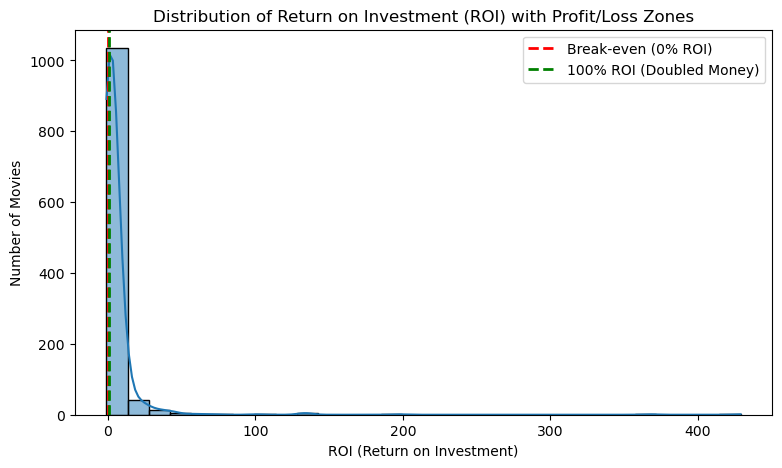

In [567]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))
sns.histplot(data=movies, x='roi', bins=30, kde=True)

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even (0% ROI)')
plt.axvline(1, color='green', linestyle='--', linewidth=2, label='100% ROI (Doubled Money)')

plt.title("Distribution of Return on Investment (ROI) with Profit/Loss Zones")
plt.xlabel("ROI (Return on Investment)")
plt.ylabel("Number of Movies")
plt.legend()
plt.show()


# Plot for Release Month on Revenue


In [568]:
import pandas as pd

budgets = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")
budgets.head()
budgets.columns


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [569]:
# Converting release_date to datetime
budgets['release_date'] = pd.to_datetime(budgets['release_date'], errors='coerce')

# Extracting month number and month name
budgets['release_month'] = budgets['release_date'].dt.month
budgets['release_month_name'] = budgets['release_date'].dt.month_name()

budgets[['movie', 'release_date', 'release_month', 'release_month_name']].head()


,movie,release_date,release_month,release_month_name
0,Avatar,2009-12-18,12,December
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,May
2,Dark Phoenix,2019-06-07,6,June
3,Avengers: Age of Ultron,2015-05-01,5,May
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,12,December


In [570]:
print("BUDGETS COLUMNS:\n", budgets.columns.tolist())
print("\nMOVIES COLUMNS:\n", movies.columns.tolist())


BUDGETS COLUMNS:
 ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_month', 'release_month_name']

MOVIES COLUMNS:
 ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'avg_rating', 'votes', 'year', 'main_genre', 'title_norm', 'title', 'domestic_gross', 'foreign_gross', 'domestic_gross_millions', 'foreign_gross_millions', 'rating_category', 'decade', 'log_revenue', 'worldwide_gross', 'production_budget_x', 'worldwide_gross_budget_x', 'roi', 'release_month_x', 'release_month_name_x', 'budget_category', 'production_budget_y', 'worldwide_gross_budget_y', 'production_budget', 'worldwide_gross_budget', 'release_month_y', 'release_month_name_y', 'production_budget_tn', 'worldwide_gross_tn', 'release_date', 'release_month', 'release_month_name']


In [571]:
import pandas as pd, calendar

def add_release_month_from_budgets(movies):
    # Loading TN budgets 
    budgets = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")
    budgets["release_date"] = pd.to_datetime(budgets["release_date"], errors="coerce")
    budgets["year"] = budgets["release_date"].dt.year
    budgets["release_month"] = budgets["release_date"].dt.month
    budgets["release_month_name"] = budgets["release_month"].apply(
        lambda m: calendar.month_name[m] if pd.notnull(m) else None
    )

    def norm(s):
        return (s.astype("string").str.lower()
                .str.replace(r"\([^)]*\)", " ", regex=True)
                .str.replace(r"[^a-z0-9 ]", " ", regex=True)
                .str.replace(r"\s+", " ", regex=True).str.strip())

    if "title_norm" not in movies.columns:
        base = "primary_title" if "primary_title" in movies.columns else "title"
        movies["title_norm"] = norm(movies[base])
    budgets["title_norm"] = norm(budgets["movie"])

    if "year" not in movies.columns and "start_year" in movies.columns:
        movies["year"] = pd.to_numeric(movies["start_year"], errors="coerce")

    month_df = budgets[["title_norm","year","release_date",
                        "release_month","release_month_name"]].dropna(subset=["release_month"]).drop_duplicates(["title_norm","year"])

    
    movies = movies.drop(columns=[c for c in ["release_date","release_month","release_month_name"] if c in movies.columns], errors="ignore")
    return movies.merge(month_df, on=["title_norm","year"], how="left")


movies = add_release_month_from_budgets(movies)
print([c for c in movies.columns if "release" in c or "month" in c])


['release_month_x', 'release_month_name_x', 'release_month_y', 'release_month_name_y', 'release_date', 'release_month', 'release_month_name']


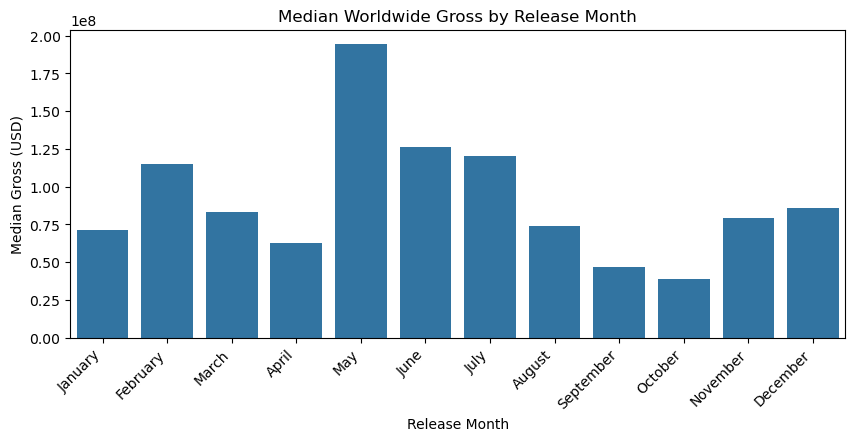

In [572]:
import matplotlib.pyplot as plt
import seaborn as sns

gross_col = "worldwide_gross" 

order = ["January","February","March","April","May","June",
         "July","August","September","October","November","December"]

mperf = (movies.dropna(subset=[gross_col,"release_month_name"])
               .groupby("release_month_name")[gross_col]
               .median()
               .reindex(order))

plt.figure(figsize=(10,4))
sns.barplot(x=mperf.index, y=mperf.values)
plt.title(f"Median {gross_col.replace('_',' ').title()} by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Median Gross (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()


# Conclusion and Strategic Recommendations
Based on the analysis of the ratings,budgets,ROI and movie perfomance across revenue here are following conclusion we should adhere to

# 1:Focusing on High-Performing Genres
Actions,Adventure,Animation and Sci-Fi consistently generate the highest box office returns and they attract large audience globally. 
# Recommendation
The company should priotize production of Action/Adventure/Sci-Fi films, with occasional diversification into family genres to avoid risk.

# 2:Focus on Movies with higher Audience Ratings Influence
Movies with higher ratings tend to earn more and attract stronger word-of-mouth marketing.There is a positive correlation between IMDb ratings and revenue,meaning quality pays off.
# Recommendation
Invest in strong scripts, experienced directors and talent to maintain a high-quality standard.

# 3:Timimg should be on point when it comes to releasing of Movies
Results show that June, July, and December releases generates the highest earnings. The reason to this is because these periods align with school holidays and festive seasons when cinema attendace peaks.
# Recommendation
Release major Films in Summer(June-July) or the Holiday season(November-December) for maximum revenue.

# Final Takeaway
To maximize profits and good return on investement the company should invest mainly in Action/Adventure/Sci-Fi films, maintain high production quality and strategically release films in peak seasons.